In [2]:
using DataFrames
using CSV
using Plots
using Images
using StatsPlots

In [18]:
key = "tail"

folder_path = joinpath(@__DIR__, "export", key)
data_480_640 = CSV.read(joinpath(folder_path, "export_data.csv"), DataFrame)

sx = repeat(["RSE", "SDM"], inner = 3)
nam = repeat(["240×320", "360×480", "480×640"], outer = 2)

data = filter(x -> x.Method == "sdm_data_zoom" || x.Method == "rse_data_zoom", data_480_640)

,Method,Dims,S,Dx,Dy,SSI,SMPI,ENL
,String,String,Int64,Int64,Int64,Float64,Float64,Float64
1,rse_data_zoom,240_320,70,80,140,0.603161,0.552753,0.895931
2,rse_data_zoom,360_480,70,130,60,0.643074,0.578795,0.78817
3,rse_data_zoom,480_640,70,50,100,0.692586,0.623299,0.679508
4,sdm_data_zoom,240_320,70,80,140,0.689186,0.707523,0.686229
5,sdm_data_zoom,360_480,70,130,60,0.734081,0.740868,0.604859
6,sdm_data_zoom,480_640,70,50,100,0.782211,0.783729,0.532713


In [4]:
theme(:ggplot2)
pgfplotsx()

Plots.PGFPlotsXBackend()

## Find the color you want to use

In [5]:
using ColorSchemes
using Colors

In [47]:
ColorSchemes.rainbow

In [89]:
#color = [ColorSchemes.rainbow[2], ColorSchemes.rainbow[6]]

In [6]:
cgradients()

6-element Array{Symbol,1}:
 :blues
 :viridis
 :pu_or
 :magma
 :plasma
 :inferno

In [7]:
color = [cgrad(:pu_or)[1], cgrad(:pu_or)[3]]

## Ploting

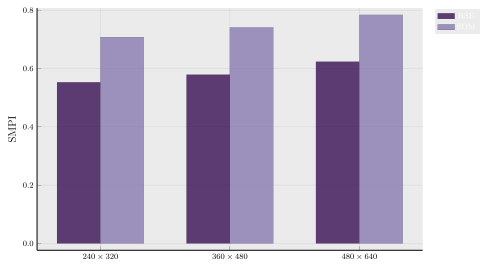

In [19]:
p_ENL = groupedbar(nam, data.ENL, group = sx, ylabel = "ENL",
    fillalpha = 0.75,color = repeat(color, inner=3), legend = false,
    bar_width = 0.67, lw = 0, tex_output_standalone = true)

p_SSI = groupedbar(nam, data.SSI, group = sx, ylabel = "SSI",
    fillalpha = 0.75, color = repeat(color, inner=3), legend = false,
    bar_width = 0.67, lw = 0, tex_output_standalone = true)

p_SMPI = groupedbar(nam, data.SMPI, group = sx, ylabel = "SMPI",
    fillalpha = 0.75, color = repeat(color, inner=3),
    bar_width = 0.67, lw = 0, tex_output_standalone = true)

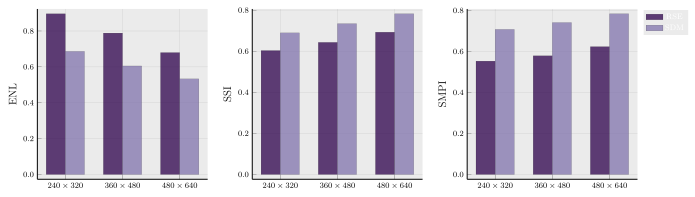

In [20]:
p = plot(p_ENL, p_SSI, p_SMPI, layout=(1, 3), size=(900, 300), tex_output_standalone = true)

In [21]:
saving_path = joinpath(@__DIR__, "Plot")
savefig(p, joinpath(saving_path, "Bar_$key.tex"))